In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

In [579]:
train_df = pd.read_csv('train.csv')
age_gender_df = pd.read_csv('age_gender_info.csv')
test_df = pd.read_csv('test.csv')

In [580]:
train_df[train_df['단지코드']=='C1004']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
764,C1004,521,아파트,충청남도,영구임대,39.30,240,3.0,C,4682000,104180,NaN,2.0,153.0,93.0
765,C1004,521,아파트,충청남도,영구임대,39.69,264,3.0,C,4728000,105210,NaN,2.0,153.0,93.0
766,C1004,521,상가,충청남도,임대상가,19.00,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
767,C1004,521,상가,충청남도,임대상가,14.10,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
768,C1004,521,상가,충청남도,임대상가,19.31,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
769,C1004,521,상가,충청남도,임대상가,21.19,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
770,C1004,521,상가,충청남도,임대상가,21.19,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
771,C1004,521,상가,충청남도,임대상가,22.95,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
772,C1004,521,상가,충청남도,임대상가,23.40,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
773,C1004,521,상가,충청남도,임대상가,23.40,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0


## 기본 전처리
- 데이콘에서 제시한 오류 2번, 3번 제거
- 숫자형 데이터 : 0 으로 결측치 채움
- 범주형 데이터 : 같은 단지의 같은 코드로 결측치 채움
- 완전히 동일한 중복행 제거

In [581]:
def data_preprocessing(train_df, test_df):
    
    # 오류 2번, 3번만 제거 : 1번은 감안하여 분석 하세요!
    error_data = error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']
    
    for error in error_data :
        train_df = train_df[train_df['단지코드'] != error]
    
    train_df.loc[train_df['임대보증금'] == '-','임대보증금'] = np.nan
    train_df.loc[train_df['임대료'] == '-','임대료'] = np.nan

    train_df['임대보증금'] = train_df['임대보증금'].astype(float)
    train_df['임대료'] = train_df['임대료'].astype(float)
    
    test_df.loc[test_df['임대보증금'] == '-','임대보증금'] = np.nan
    test_df.loc[test_df['임대료'] == '-','임대료'] = np.nan

    test_df['임대보증금'] = test_df['임대보증금'].astype(float)
    test_df['임대료'] = test_df['임대료'].astype(float)
    
    cols = ['임대보증금', '임대료','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수']

    train_df[cols] = train_df[cols].fillna(0)
    test_df[cols] = test_df[cols].fillna(0)
    
    # 수정필요함!
    test_df.loc[ (test_df['단지코드']=='C2411') & (test_df['자격유형'].isnull()),'자격유형'] = 'A'
    test_df.loc[ (test_df['단지코드']=='C2253') & (test_df['자격유형'].isnull()),'자격유형'] = 'C'
    
    train_df = train_df.drop_duplicates()
    test_df = test_df.drop_duplicates()
    
    
    return train_df, test_df

In [582]:
train_df, test_df = data_preprocessing(train_df, test_df)
train_df = train_df.reset_index(drop=True)
train_init = train_df.drop('단지코드',axis=1)

In [583]:
train_init.shape, test.shape

((2556, 14), (949, 14))

In [584]:
#

In [585]:
train_df[train_df['임대건물구분']=='상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
73,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,0.0,0.0,0.0,4.0,117.0,75.0
74,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,0.0,0.0,0.0,4.0,117.0,75.0
84,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,0.0,0.0,0.0,2.0,97.0,62.0
85,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,0.0,0.0,0.0,2.0,97.0,62.0
86,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,0.0,0.0,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,C2212,697,상가,강원도,임대상가,31.84,1,0.0,D,0.0,0.0,0.0,4.0,128.0,86.0
536,C2212,697,상가,강원도,임대상가,63.68,1,0.0,D,0.0,0.0,0.0,4.0,128.0,86.0
537,C2212,697,상가,강원도,임대상가,137.49,1,0.0,D,0.0,0.0,0.0,4.0,128.0,86.0
542,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,0.0,0.0,0.0,1.0,65.0,62.0


### 범주형 데이터 전처리
- 원핫인코딩

In [586]:
train = pd.get_dummies(train_init)

In [587]:
train.shape

(2556, 53)

In [588]:
train.columns # 임대건물구분, 지역, 공급유형, 자격유형 -> 범주형 변수를 원핫인코딩으로 처리.

Index(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '임대건물구분_상가', '임대건물구분_아파트', '지역_강원도', '지역_경기도', '지역_경상남도',
       '지역_경상북도', '지역_광주광역시', '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_서울특별시',
       '지역_세종특별자치시', '지역_울산광역시', '지역_전라남도', '지역_전라북도', '지역_제주특별자치도', '지역_충청남도',
       '지역_충청북도', '공급유형_공공분양', '공급유형_공공임대(10년)', '공급유형_공공임대(50년)',
       '공급유형_공공임대(5년)', '공급유형_공공임대(분납)', '공급유형_국민임대', '공급유형_영구임대', '공급유형_임대상가',
       '공급유형_장기전세', '공급유형_행복주택', '자격유형_A', '자격유형_B', '자격유형_C', '자격유형_D',
       '자격유형_E', '자격유형_F', '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K',
       '자격유형_L', '자격유형_M', '자격유형_N', '자격유형_O'],
      dtype='object')

### 데이터 분리

In [589]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

y_target = train['등록차량수']
X_data = train.drop('등록차량수',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=0)

### LinearRegression 이용한 회귀모델
- 평가지표는 대회에서 정한 MAE로 측정

In [590]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
print(mae)

134.36078705237819


### 교차검증
- scoring = 'neg_mean_absolute_error' 
- 일반적으로 scoring을 값이 클 수록 모델 성능이 좋은 것으로 사이킷런에서 인식하는데,
- mae는 값이 클 수록 모델 성능이 저하되는 것이므로 Negative 키워드를 붙여서 사용
- 값은 양수로 보기 위해 -1 곱함

In [591]:
# 교차 검증
from sklearn.model_selection import cross_val_score

mae_scores = -1 * cross_val_score(lr, X_data, y_target, scoring='neg_mean_absolute_error',cv=5)

print(mae_scores)
print(np.mean(mae_scores))

[254.46306275 137.83352433 119.121148   174.02640801 246.29458308]
186.34774523513798


### 릿지와 라쏘 규제
- 회귀계수 값의 차이가 너무 크게 남.
- 규제 적용을 해보자

In [592]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
tkr
mae_scores = -1 * cross_val_score(ridge, X_data, y_target, scoring='neg_mean_absolute_error',cv=5)

print(mae_scores)
print(np.mean(mae_scores))

[263.06846595 138.66787736 119.42754998 169.25500872 209.83412229]
180.05060485963511


In [593]:
# 회귀계수 값의 차이가 너무 크게 나서,
# 규제 적용을 해보자

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)

mae_scores = -1 * cross_val_score(lasso, X_data, y_target, scoring='neg_mean_absolute_error',cv=5)

print(mae_scores)
print(np.mean(mae_scores))

[278.52890251 140.1565933  110.83523215 173.35395185 171.25191903]
174.82531976977975


In [594]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=10)

mae_scores = -1 * cross_val_score(elastic, X_data, y_target, scoring='neg_mean_absolute_error',cv=5)

print(mae_scores)
print(np.mean(mae_scores))

[273.80517017 139.91008926 111.24267413 172.83100692 171.84234941]
173.92625797856505


### 결과
- LinearRegression : 186.3
- Ridge : 180.0 (alpha=10)
- Lasso : 174.8 (alpha=10)
- ElasticNet : 173.9 (alpha=10)
- (최적의 alpha 값 찾는 것도 후에 고려 필요)

**규제만으로는 여전히 에러값이 너무 큼**

### kfold 검증 함수 생성
- log 변환시 교차 검증 후 mae 값이 기존 mae 값과 비교 어려움.
- 같은 수치로 비교 하기 위해 kfold 사용
- 타깃값의 skew를 제거하기 전과 후 비교

In [595]:
from sklearn.model_selection import KFold

def kfold_val(n, model, X_data, y_target,expm1):
    kfold = KFold(n_splits=n)
    cv_mae=[]

    n_iter = 0 

    for train_index, test_index in kfold.split(X_data):
        X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
        y_train, y_test = y_target[train_index], y_target[test_index]
        # 학습 및 예측

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        n_iter += 1

        if expm1 :
            y_t = np.expm1(y_test)
            y_p = np.expm1(y_pred)
        else:
            y_t = y_test
            y_p = t_pred

        a = 0
        mae = mean_absolute_error(y_t,y_p)
        train_size = X_train.shape[0]
        test_size = X_test.shape[0]
#         print('\n#{0} 교차 검증 MAE :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, mae, train_size, test_size))
        cv_mae.append(mae)
    # 개별 iteration별 정확도를 합하여 평균 정확도 계산
    print(model, '\n## 평균 검증 MAE:', np.mean(cv_mae))
    return np.mean(cv_mae)

## 데이터 변환 (추가 전처리)
- 선형 회귀 모델은 피처값과 타깃값의 분포가 정규분포 형태를 매우 선호.
- **특히! 타깃값의 경우 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향 미칠 가능성 높음.**


### target 로그변환 + feature 로그변환
- 데이터 EDA시, 타깃값 뿐만아니라 피처값들도 오른쪽 꼬리가 긴 skew 가 많이 나타남.
- 타깃값과 피처값 모두 로그 변환 후 평가 진행

In [596]:
y_target_log = np.log1p(train['등록차량수']) # 타깃에 로그함수 적용
X_data_log = np.log1p(X_data)
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=10)
elastic_reg = ElasticNet(alpha=10)

# 성능 평가
models = [lr_reg, ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, X_data_log, y_target_log,True)

LinearRegression() 
## 평균 검증 MAE: 176.49434423156475
Ridge(alpha=10) 
## 평균 검증 MAE: 149.73366850188603
Lasso(alpha=10) 
## 평균 검증 MAE: 343.9587984146907
ElasticNet(alpha=10) 
## 평균 검증 MAE: 343.9587984146907


### 로그변환(target+feature) 적용 후 Ridge 의 성능이 많이 개선됨.
- LinearRegression : 186.3 -> 176.4 
- **Ridge : 180.0 (alpha=10) -> 149.7**
- Lasso : 174.8 (alpha=10) -> 343.9
- ElasticNet : 173.9 (alpha=10) -> 343. 9

### Ridge, Lasso, Elastic 최적의 파라미터 찾기

In [597]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params,X_data, y_target):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_absolute_error', cv=5)
    grid_model.fit(X_data, y_target)
    mae = -1 *  grid_model.best_score_
    print('{0} 5 CV 시 최적 평균 로그 변환된 MAE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(mae, 4), grid_model.best_params_))
    return grid_model.best_estimator_

- 타깃과 피처 모두 로그 변환된 상태에서 최적의 파라미터 찾기

In [598]:
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

best_ridge=get_best_params(ridge_reg,ridge_params,X_data_log,y_target_log)
best_lasso = get_best_params(lasso_reg,lasso_params,X_data_log,y_target_log)
best_elastic = get_best_params(elastic,elastic_params,X_data_log,y_target_log)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2958, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.3034, 최적 alpha:{'alpha': 0.005}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2982, 최적 alpha:{'alpha': 0.001}


In [599]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [lr_reg, ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, X_data_log, y_target_log,True)

LinearRegression() 
## 평균 검증 MAE: 176.49434423156475
Ridge(alpha=5) 
## 평균 검증 MAE: 150.91111135172
Lasso(alpha=0.005) 
## 평균 검증 MAE: 155.49801926244294
ElasticNet(alpha=0.001) 
## 평균 검증 MAE: 152.7007431415346



### 라쏘와 엘라스틱넷이 최적 파라미터 적용시 성능 개선 많이 됨
##### 모델 : 기본전처리 -> 로그변환 -> 최적파라미터
- LinearRegression : 186.3    ->       176.4        -> 176.4
- Ridge : 180.0 (alpha=5)    ->       149.7        -> 150.9
- **Lasso : 174.8 (alpha=0.005)    ->       343.9        -> 155.4**
- **ElasticNet : 173.9 (alpha=0.001) ->     343.9        -> 152.7**


### 다른 형식으로 데이터 변환

- 데이터 스케일링/정규화 작업 필요
1. StandardScaler
2. MinMaScaler
3. log 함수
4. 다항 특성 적용

- 타깃값 : log변환적용
- 피처값
1. 표준정규화
2. 표준정규화 + 2차다항
3. MinMax 
4. MinMax + 2차다항
5. log변환
6. log변환 + 2차다항

In [600]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method =='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    print(scaled_data)
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [555]:
scale_methods=[ ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None), ('Log', 2)]

# scale_methods=[ ('Standard', None)]

for s in scale_methods:

    X_scaled_data = get_scaled_data(method=s[0], p_degree=s[1], input_data=X_data)
    print(s[0], '+', s[1])

    X_scaled_df = pd.DataFrame(X_scaled_data)
#     print(X_scaled_df.iloc[364])
#     print(y_target_log[364])
    ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
    lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
    elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

    best_ridge=get_best_params(ridge_reg,ridge_params,X_scaled_data,y_target_log)
    best_lasso = get_best_params(lasso_reg,lasso_params,X_scaled_data,y_target_log)
    best_elastic = get_best_params(elastic,elastic_params,X_scaled_data,y_target_log)
    
#     lr_reg = LinearRegression()
    ridge_reg = Ridge(alpha=best_ridge.alpha)
    lasso_reg = Lasso(alpha=best_lasso.alpha)
    elastic_reg = ElasticNet(alpha=best_elastic.alpha)

    # 성능 평가
    models = [ ridge_reg, lasso_reg, elastic_reg]
#     print(y_target_log)
#     print(X_scaled_df)
    for model in models:
        kfold_val(5, model, X_scaled_df, y_target_log,True)

[[-0.63358923 -0.37480147  1.1831608  ... -0.02798366 -0.10712637
  -0.01978356]
 [-0.63358923 -0.18800842 -0.40090188 ... -0.02798366 -0.10712637
  -0.01978356]
 [-0.63358923 -0.18800842 -0.69424682 ... -0.02798366 -0.10712637
  -0.01978356]
 ...
 [-1.26134107  0.18222028 -0.59157609 ... -0.02798366 -0.10712637
  -0.01978356]
 [-1.26134107  0.18924028 -0.00488621 ... -0.02798366 -0.10712637
  -0.01978356]
 [-1.26134107  0.28050028 -0.70158045 ... -0.02798366 -0.10712637
  -0.01978356]]
Standard + None
Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.3416, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.3544, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.3524, 최적 alpha:{'alpha': 0.001}
Ridge(alpha=20) 
## 평균 검증 MAE: 188.04805341449452
Lasso(alpha=0.001) 
## 평균 검증 MAE: 196.32857290370686
ElasticNet(alpha=0.001) 
## 평균 검증 MAE: 196.86619899231968
[[-0.63358923 -0.37480147  1.1831608  ... -0.02798366 -0.10712637
  -0.01978356]
 [-0.63358923 -0.18800842 -0.40090188 ... -0.02

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.3229, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.272, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2816, 최적 alpha:{'alpha': 0.005}
Ridge(alpha=20) 
## 평균 검증 MAE: 145.72983899852704
Lasso(alpha=0.001) 
## 평균 검증 MAE: 141.3377762043077
ElasticNet(alpha=0.005) 
## 평균 검증 MAE: 143.95846493747905


##### 모델 : 기본전처리 -> 로그변환 -> 최적파라미터
- LinearRegression : 186.3    ->       176.4        -> 176.4
- Ridge : 180.0 (alpha=5)    ->       149.7        -> 150.9
- **Lasso : 174.8 (alpha=0.005)    ->       343.9        -> 155.4**
- **ElasticNet : 173.9 (alpha=0.001) ->     343.9        -> 152.7**


### 로그+2차다항을 적용한 경우, 가장 좋은 성능을 보임 (타깃값 : 로그변환)

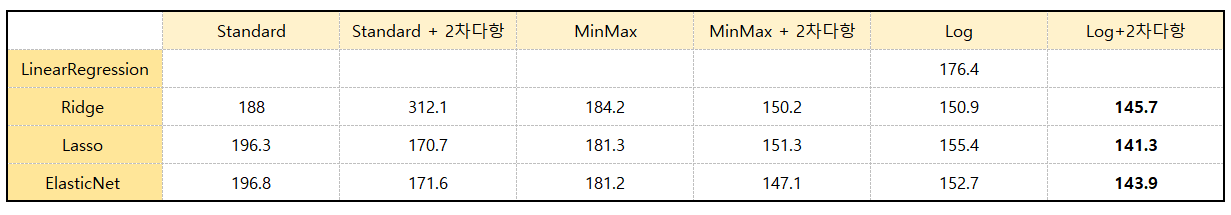

### 상관성이 높은 피처 제거 후 재평가

In [556]:
corr_df = train_init.corr()
corr_df

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
총세대수,1.000000,0.061466,0.170553,0.106555,-0.072037,-0.100135,0.132821,0.038666,0.619023,0.433674
전용면적,0.061466,1.000000,-0.069378,-0.105593,0.107666,0.169341,0.003153,-0.001529,0.024190,0.071716
전용면적별세대수,0.170553,-0.069378,1.000000,0.146410,0.029523,0.087320,-0.025357,0.053276,0.237925,0.196216
공가수,0.106555,-0.105593,0.146410,1.000000,0.161840,-0.032658,-0.113684,0.051127,0.308712,0.108960
임대보증금,-0.072037,0.107666,0.029523,0.161840,1.000000,0.589127,-0.008649,0.124869,0.300213,0.349826
임대료,-0.100135,0.169341,0.087320,-0.032658,0.589127,1.000000,0.017883,0.056935,0.344675,0.472451
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.132821,0.003153,-0.025357,-0.113684,-0.008649,0.017883,1.000000,0.104026,-0.020911,-0.058399
도보 10분거리 내 버스정류장 수,0.038666,-0.001529,0.053276,0.051127,0.124869,0.056935,0.104026,1.000000,0.103797,0.125265
단지내주차면수,0.619023,0.024190,0.237925,0.308712,0.300213,0.344675,-0.020911,0.103797,1.000000,0.848783
등록차량수,0.433674,0.071716,0.196216,0.108960,0.349826,0.472451,-0.058399,0.125265,0.848783,1.000000


**임대료와 임대보증금은 높은 상관관계를 가지므로 한 피처는 삭제**

- 등록차량수(타깃)와 임대료가 더 높은 상관관계를 가지므로 임대보증금을 삭제하도록 한다.

In [601]:
X_data_co_rmv = train_init.drop(['임대보증금','등록차량수'],axis=1)
X_data_co_rmv = pd.get_dummies(X_data_co_rmv)
X_data_co_rmv_log = get_scaled_data(method='Log', p_degree=2, input_data=X_data_co_rmv)
X_data_co_rmv_log = pd.DataFrame(X_data_co_rmv_log)

          총세대수      전용면적  전용면적별세대수       공가수        임대료  \
0     6.302619  3.540379  5.624018  2.890372  11.325885   
1     6.302619  3.703768  4.110874  2.890372  11.581808   
2     6.302619  3.703768  3.044522  2.890372  11.581808   
3     6.302619  3.869116  3.663562  2.890372  11.916796   
4     6.302619  3.869116  2.995732  2.890372  11.916796   
...        ...       ...       ...       ...        ...   
2551  5.480639  3.916015  2.995732  2.079442  11.662130   
2552  5.480639  3.952781  3.555348  2.079442  11.865770   
2553  5.480639  3.965185  3.555348  2.079442  11.865770   
2554  5.480639  3.969537  4.744932  2.079442  11.865770   
2555  5.480639  4.024458  2.995732  2.079442  11.925240   

      도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수   단지내주차면수  임대건물구분_상가  \
0                              0.0            1.386294  6.437752        0.0   
1                              0.0            1.386294  6.437752        0.0   
2                              0.0            1.386294

In [603]:

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

best_ridge=get_best_params(ridge_reg,ridge_params,X_data_co_rmv_log,y_target_log)
best_lasso = get_best_params(lasso_reg,lasso_params,X_data_co_rmv_log,y_target_log)
best_elastic = get_best_params(elastic,elastic_params,X_data_co_rmv_log,y_target_log)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, X_data_co_rmv_log, y_target_log,True)


Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2937, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2689, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.278, 최적 alpha:{'alpha': 0.005}
Ridge(alpha=20) 
## 평균 검증 MAE: 144.91085618291385
Lasso(alpha=0.001) 
## 평균 검증 MAE: 140.8523755088112
ElasticNet(alpha=0.005) 
## 평균 검증 MAE: 142.12603955897595


#### 임대보증금 삭제 후 성능 약간 개선됨.
- Ridge(alpha=1) 
    - 145.7 => 144.9
- Lasso(alpha=0.001) 
    - 141.3 => 140.8
- ElasticNet(alpha=0.001) 
    - 143.9 => 142.1

### 단지코드 별 집계

In [604]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train, test = data_preprocessing(train_df, test_df)

unique_cols = ['총세대수', '지역', '공가수', 
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

In [605]:
train_agg

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0
C1898,566,전라북도,9.0,0.0,6.0,517.0,415.0
...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,57.0
C2035,492,강원도,24.0,0.0,1.0,521.0,246.0
C2020,40,부산광역시,7.0,1.0,2.0,25.0,19.0


In [606]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

In [607]:
reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1000,0.0,1.0
C1004,1.0,1.0
C1005,0.0,1.0
C1013,0.0,1.0
C1014,0.0,1.0
...,...,...
C2663,0.0,1.0
C2666,0.0,1.0
C2670,0.0,1.0


In [608]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

In [609]:
set(train.공급유형)

{'공공임대(50년)', '공공임대(5년/10년/분납/분양)', '국민임대/장기전세', '영구임대', '임대상가', '행복주택'}

In [610]:
reshape_cat_features(data=train, cast_col='공급유형', value_col='counter')

,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,,
C1000,0.0,0.0,1.0,0.0,0.0,0.0
C1004,0.0,0.0,0.0,1.0,1.0,0.0
C1005,0.0,0.0,1.0,0.0,0.0,0.0
C1013,0.0,0.0,1.0,0.0,0.0,0.0
C1014,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
C2663,0.0,0.0,1.0,0.0,0.0,0.0
C2666,0.0,0.0,1.0,0.0,0.0,0.0
C2670,0.0,0.0,1.0,0.0,0.0,0.0


In [611]:
train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

In [612]:
train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

In [613]:
reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')

,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
단지코드,,,,,
C1000,1.0,0.0,0.0,0.0,0.0
C1004,0.0,1.0,0.0,1.0,0.0
C1005,1.0,0.0,0.0,0.0,0.0
C1013,1.0,0.0,0.0,0.0,0.0
C1014,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
C2663,0.0,0.0,1.0,0.0,0.0
C2666,1.0,0.0,0.0,0.0,0.0
C2670,1.0,0.0,0.0,0.0,0.0


In [614]:
train_agg = pd.concat([train_agg,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')], axis=1)


In [615]:
train_agg.shape

(412, 20)

In [616]:
train_agg.columns

Index(['총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수', '임대건물구분_상가', '임대건물구분_아파트',
       '공급유형_공공임대(50년)', '공급유형_공공임대(5년/10년/분납/분양)', '공급유형_국민임대/장기전세',
       '공급유형_영구임대', '공급유형_임대상가', '공급유형_행복주택', '자격유형_A', '자격유형_D',
       '자격유형_국민임대/장기전세_공급대상', '자격유형_영구임대_공급대상', '자격유형_행복주택_공급대상'],
      dtype='object')

In [617]:
train_agg

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
단지코드,,,,,,,,,,,,,,,,,,,,
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1898,566,전라북도,9.0,0.0,6.0,517.0,415.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,57.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2035,492,강원도,24.0,0.0,1.0,521.0,246.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2020,40,부산광역시,7.0,1.0,2.0,25.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [618]:
from sklearn.model_selection import GridSearchCV

def get_best_params2(model, params,X_data, y_target):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_absolute_error', cv=10)
    grid_model.fit(X_data, y_target)
    mae = -1 *  grid_model.best_score_
    print('{0} 5 CV 시 최적 평균 로그 변환된 MAE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(mae, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [619]:
X_data_agg = train_agg.drop(['등록차량수'],axis=1)
y_target_agg =  np.log1p(train_agg['등록차량수'])
X_data_agg_ohe = pd.get_dummies(X_data_agg)
X_data_agg_ohe
X_data_agg_scaled = get_scaled_data(method='Log', p_degree=2, input_data=X_data_agg_ohe)
X_data_agg_scaled = pd.DataFrame(X_data_agg_scaled)

           총세대수       공가수  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  \
단지코드                                                                          
C2515  6.302619  2.890372                      0.000000            1.386294   
C1407  7.104144  2.639057                      0.693147            0.693147   
C1945  6.628041  1.945910                      0.693147            1.386294   
C1470  6.546785  2.708050                      0.000000            1.098612   
C1898  6.340359  2.302585                      0.000000            1.945910   
...         ...       ...                           ...                 ...   
C2586  4.510860  2.079442                      0.000000            1.386294   
C2035  6.200509  3.218876                      0.000000            0.693147   
C2020  3.713572  2.079442                      0.693147            1.098612   
C2437  4.510860  2.564949                      0.000000            0.693147   
C2532  5.480639  2.079442                      0.000

In [620]:
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

best_ridge=get_best_params2(ridge_reg,ridge_params,X_data_agg_scaled,y_target_agg)
best_lasso = get_best_params2(lasso_reg,lasso_params,X_data_agg_scaled,y_target_agg)
best_elastic = get_best_params2(elastic,elastic_params,X_data_agg_scaled,y_target_agg)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(10, model, X_data_agg_scaled, y_target_agg,True)


Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.253, 최적 alpha:{'alpha': 1}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2552, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2544, 최적 alpha:{'alpha': 0.005}
Ridge(alpha=1) 
## 평균 검증 MAE: 128.3701678662006
Lasso(alpha=0.001) 
## 평균 검증 MAE: 130.40438716328725
ElasticNet(alpha=0.005) 
## 평균 검증 MAE: 127.90704311274706


#### 단지별 그룹화 후 성능 개선됨.
- Ridge(alpha=1) 
    - 145.7 => 138.9
- Lasso(alpha=0.001) 
    - 141.3 => 137.4
- ElasticNet(alpha=0.001) 
    - 143.9 => 140.7

# 다시시작

In [513]:
train_df = pd.read_csv('train.csv')
age_gender_df = pd.read_csv('age_gender_info.csv')
test_df = pd.read_csv('test.csv')

In [514]:
train_df, test_df = data_preprocessing(train_df, test_df)
train_df = train_df.reset_index(drop=True)
# train_init = train_df.drop('단지코드',axis=1) 

In [515]:
train = train_df.copy()
test = test_df.copy()

In [516]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

In [517]:
local_map={}
for i, loc in enumerate(train['지역'].unique()):
    local_map[loc]=i
#'경상북도': 0, '경상남도': 1, '대전광역시': 2, '경기도': 3, '전라북도': 4, '강원도': 5, '광주광역시': 6, 
# '충청남도': 7, '부산광역시': 8, '제주특별자치도': 9, '울산광역시': 10, '충청북도': 11, '전라남도': 12, '대구광역시': 13, 
# '서울특별시': 14, '세종특별자치시': 15

case_map={}
for i, case in enumerate(train['임대건물구분'].unique()):
    case_map[case] = i
#'아파트': 0, '상가': 1

supply_map={}
for i, stype in enumerate(train['공급유형'].unique()):
    supply_map[stype] =i
#'국민임대': 0, '공공임대(50년)': 1, '영구임대': 2, '임대상가': 3, '공공임대(10년)': 4, 
# '공공임대(분납)': 5, '장기전세': 6, '공공분양': 7, '행복주택': 8, '공공임대(5년)': 9
# ---> 수정됨
#'국민임대/장기전세': 0, '공공임대(50년)': 1, '영구임대': 2, '임대상가': 3, '공공임대(5년/10년/분납/분양)': 4, '행복주택': 5

type_map={}
for i, s_type in enumerate(train['자격유형'].unique()):
    type_map[s_type] = i


train['지역'] = train['지역'].map(local_map)
test['지역'] = test['지역'].map(local_map)

train['임대건물구분'] = train['임대건물구분'].map(case_map)
test['임대건물구분'] = test['임대건물구분'].map(case_map)

train['공급유형'] = train['공급유형'].map(supply_map)
test['공급유형'] = test['공급유형'].map(supply_map)

train['자격유형'] = train['자격유형'].map(type_map)
test['자격유형'] = test['자격유형'].map(type_map)

In [518]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,0,0,0,33.48,276,17.0,0,9216000.0,82940.0,0.0,3.0,624.0,205.0
1,C2515,545,0,0,0,39.60,60,17.0,0,12672000.0,107130.0,0.0,3.0,624.0,205.0
2,C2515,545,0,0,0,39.60,20,17.0,0,12672000.0,107130.0,0.0,3.0,624.0,205.0
3,C2515,545,0,0,0,46.90,38,17.0,0,18433000.0,149760.0,0.0,3.0,624.0,205.0
4,C2515,545,0,0,0,46.90,19,17.0,0,18433000.0,149760.0,0.0,3.0,624.0,205.0


In [519]:
total_area = train['전용면적']*train['전용면적별세대수']
train['전체면적합'] = total_area

total_area = test['전용면적']*test['전용면적별세대수']
test['전체면적합'] = total_area

total_fee = train['임대보증금'] * train['전용면적별세대수']
train['건물가치'] = total_fee

average_fee = total_fee / train['총세대수']
train['평균임대'] = average_fee

total_fee = test['임대보증금'] * test['전용면적별세대수']
test['건물가치'] = total_fee
average_fee = total_fee / test['총세대수']
test['평균임대'] = average_fee

train['is_55미만'] = np.where(train['전용면적']<55,1,0)
train['is_55이상'] = np.where(train['전용면적']>=55,1,0)
test['is_55미만'] = np.where(test['전용면적']<55,1,0)
test['is_55이상'] = np.where(test['전용면적']>=55,1,0)

train['temp_55미만'] = train['is_55미만']*train['전용면적별세대수']
train['temp_55이상'] = train['is_55이상']*train['전용면적별세대수']
test['temp_55미만'] = test['is_55미만']*test['전용면적별세대수']
test['temp_55이상'] = test['is_55이상']*test['전용면적별세대수']

train['아파트'] = np.where(train['임대건물구분']==0, 1, 0)
train['상가'] = np.where(train['임대건물구분']==1, 1, 0)
test['아파트'] = np.where(test['임대건물구분']==0, 1, 0)
test['상가'] = np.where(test['임대건물구분']==1, 1, 0)

In [520]:
train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5

idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<15].index
train.loc[idx, '전용면적'] = 15
idx = test[test['전용면적']<15].index
test.loc[idx, '전용면적'] = 15

In [521]:
new_total_area=[] # 전체 면적합 저장
change_index=[0] # 단지코드가 변화하는 인덱스를 저장
new_total_fee=[] # 전체 임대료 저장
new_average_fee=[] # 평균 임대료 저장
is_apt=[]
is_store=[]
over_55=[]
lower_55=[]
change_index_number = 0

for i, code in enumerate(train['단지코드'].unique()):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0]) #shape[0] : 행의 개수, shape[1] : 열의 개수

    number = temp.shape[0]

    change_index_number += number
    change_index.append(change_index_number)

    lastvalue_area = 0
    lastvalue_fee = 0
    lastvalue_avgfee =0
    lastvalue_over55=0
    lastvalue_lower55=0
    aptvalue=0
    storevalue=0
    for j in range(number): # 같은 단지 코드내에서 연산 돌아가는 루프
        lastvalue_area +=train.iloc[change_index[i]+j]['전체면적합'] # 같은 코드의 전용면적*세대수 총 합
        lastvalue_fee += train.iloc[change_index[i]+j]['건물가치']
        lastvalue_avgfee += train.iloc[change_index[i]+j]['평균임대']
        lastvalue_over55 += train.iloc[change_index[i]+j]['temp_55이상']
        lastvalue_lower55 += train.iloc[change_index[i]+j]['temp_55미만']
        aptvalue +=train.iloc[change_index[i]+j]['아파트']
        storevalue += train.iloc[change_index[i]+j]['상가']

    new_total_area.append(lastvalue_area)
    new_total_fee.append(lastvalue_fee)
    new_average_fee.append(lastvalue_avgfee)
    over_55.append(lastvalue_over55)
    lower_55.append(lastvalue_lower55)
    if aptvalue != 0:
        is_apt.append(1)
    else:
        is_apt.append(aptvalue)
    if storevalue != 0:
        is_store.append(1)
    else:
        is_store.append(storevalue)

test_new_total_area=[] # 전체 면적합 저장
test_new_total_fee=[] # 전체 임대료 저장
test_new_average_fee=[] # 평균 임대료 저장
test_change_index=[0] # 단지코드가 변화하는 인덱스를 저장
test_over_55=[]
test_lower_55=[]
test_is_apt=[]
test_is_store=[]
test_change_index_number = 0

for i, code in enumerate(test['단지코드'].unique()):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0]) #shape[0] : 행의 개수, shape[1] : 열의 개수

    number = temp.shape[0]

    test_change_index_number += number
    test_change_index.append(test_change_index_number)

    lastvalue_area = 0
    lastvalue_fee = 0
    lastvalue_avgfee =0
    lastvalue_over55=0
    lastvalue_lower55=0
    aptvalue=0
    storevalue=0
    for j in range(number): # 같은 단지 코드내에서 연산 돌아가는 루프
        lastvalue_area +=test.iloc[test_change_index[i]+j]['전체면적합'] # 같은 코드의 전용면적*세대수 총 합
        lastvalue_fee += test.iloc[test_change_index[i]+j]['건물가치']
        lastvalue_avgfee += test.iloc[test_change_index[i]+j]['평균임대']
        lastvalue_over55 += test.iloc[test_change_index[i]+j]['temp_55이상']
        lastvalue_lower55 += test.iloc[test_change_index[i]+j]['temp_55미만']
        aptvalue +=test.iloc[test_change_index[i]+j]['아파트']
        storevalue += test.iloc[test_change_index[i]+j]['상가']

    test_new_total_area.append(lastvalue_area)
    test_new_total_fee.append(lastvalue_fee)
    test_new_average_fee.append(lastvalue_avgfee)
    test_over_55.append(lastvalue_over55)
    test_lower_55.append(lastvalue_lower55)
    if aptvalue != 0:
        test_is_apt.append(1)
    else:
        test_is_apt.append(aptvalue)
    if storevalue != 0:
        test_is_store.append(1)
    else:
        test_is_store.append(storevalue)
    
new_train = pd.DataFrame()
new_test = pd.DataFrame()

columns = ['단지코드','총세대수','공급유형','자격유형','공가수', '지역', '도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','단지내주차면수']
target = '등록차량수'

for i, code in enumerate(train['단지코드'].unique()):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]
    
    #for col in area_columns:
    #    area = float(col.split('_')[-1])
    #    new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in enumerate(test['단지코드'].unique()):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]

new_train.insert(2,'단지전체면적', new_total_area)
new_test.insert(2,'단지전체면적', test_new_total_area)

new_train.insert(3,'총임대보증금', new_total_fee)
new_test.insert(3,'총임대보증금', test_new_total_fee)

new_train.insert(4,'평균임대보증금', new_average_fee)
new_test.insert(4,'평균임대보증금', test_new_average_fee)

new_train.insert(5,'55미만세대', lower_55)
new_test.insert(5,'55미만세대', test_lower_55)

new_train.insert(6,'55이상세대', over_55)
new_test.insert(6,'55이상세대', test_over_55)

new_train.insert(7, '임대건물_아파트', is_apt)
new_test.insert(7, '임대건물_아파트', test_is_apt)

new_train.insert(8, '임대건물_상가', is_store)
new_test.insert(8, '임대건물_상가', test_is_store)

In [522]:
cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수']
for col in cols:
    mf = new_train[col].value_counts().idxmax()
    new_train[col].fillna(mf,inplace=True)

cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수']
for col in cols:
    mf = new_test[col].value_counts().idxmax()
    new_test[col].fillna(mf,inplace=True)

In [523]:
x_train = new_train.iloc[:, 1:-1]
y_train = new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]
x_train['평균임대보증금'][349]

0.0

In [528]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method =='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [529]:
x_train.iloc[349]

총세대수                             1934.00
단지전체면적                          61838.26
총임대보증금                              0.00
평균임대보증금                             0.00
55미만세대                           1934.00
55이상세대                              0.00
임대건물_아파트                            1.00
임대건물_상가                             0.00
공급유형                                0.00
자격유형                                1.00
공가수                                43.00
지역                                  7.00
도보 10분거리 내 지하철역 수(환승노선 수 반영)        0.00
도보 10분거리 내 버스정류장 수                  4.00
단지내주차면수                          1670.00
Name: 349, dtype: float64

In [531]:

x_train_new_sc = get_scaled_data(method='Log', p_degree=2, input_data=x_train)
x_train_new_sc = pd.DataFrame(x_train_new_sc)
y_train_log = np.log1p(y_train)
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

best_ridge=get_best_params(ridge_reg,ridge_params,x_train_new_sc,y_train_log)
best_lasso = get_best_params(lasso_reg,lasso_params,x_train_new_sc,y_train_log)
best_elastic = get_best_params(elastic,elastic_params,x_train_new_sc,y_train_log)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, x_train_new_sc, y_train_log,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.4122, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.3262, 최적 alpha:{'alpha': 0.05}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.3264, 최적 alpha:{'alpha': 0.1}
Ridge(alpha=20) 
## 평균 검증 MAE: 165.42096014895864
Lasso(alpha=0.05) 
## 평균 검증 MAE: 149.4738532584302
ElasticNet(alpha=0.1) 
## 평균 검증 MAE: 149.588645766662
